In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import mlflow
import dagshub
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dagshub.init(repo_owner='chandu1613',
             repo_name='MLProject',
             mlflow=True)

Accessing as Chandu1613

Initialized MLflow to track repo "chandu1613/MLProject"

Repository chandu1613/MLProject initialized!

In [3]:
os.environ["MLFLOW_TRACKING_USERNAME"] = "Chandu1613"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "6656b403fc3d6206838ca3affb4b3b2b84d84b8a"

In [4]:
mlflow.set_tracking_uri("https://dagshub.com/Chandu1613/MLProject.mlflow")

In [5]:
mlflow.set_experiment("Wine_Prediction_Evaluation")

2025/03/12 23:23:47 INFO mlflow.tracking.fluent: Experiment with name 'Wine_Prediction_Evaluation' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/935d2bd6f5df4d5c844f31f11b5690b1', creation_time=1741802028140, experiment_id='1', last_update_time=1741802028140, lifecycle_stage='active', name='Wine_Prediction_Evaluation', tags={}>

In [7]:
os.chdir("../")

In [12]:
pwd

'c:\\Users\\jagad\\OneDrive\\Desktop\\MLP'

In [10]:
def load_model_and_scaler(model_path, scaler_path):
    """
    Load the saved model and scaler from pickle files.
    
    Args:
        model_path (str): Path to the saved model pickle file.
        scaler_path (str): Path to the saved scaler pickle file.
    
    Returns:
        model: Loaded model.
        scaler: Loaded scaler.
    """
    with open(model_path, "rb") as f:
        model = pickle.load(f)
    with open(scaler_path, "rb") as f:
        scaler = pickle.load(f)
    return model, scaler

In [13]:
model, scaler = load_model_and_scaler("models/trainedModel.pkl", "models/scaler.pkl")
print("Model and scaler loaded successfully!")

Model and scaler loaded successfully!


In [15]:
test_data = pd.read_csv("artifacts/test.csv")  # Update the path to your test data
X_test = test_data.drop('quality', axis=1)
y_test = test_data['quality']

print("Test data loaded successfully!")
print(f"Test data shape: {X_test.shape}")

Test data loaded successfully!
Test data shape: (340, 11)


In [16]:
X_test_scaled = scaler.transform(X_test)
print("Test data scaled successfully!")

Test data scaled successfully!


In [18]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [19]:
y_pred = model.predict(X_test_scaled)
print("Predictions made successfully!")

Predictions made successfully!


In [20]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

MSE: 0.6818
MAE: 0.6973
R²: -0.0972


🏃 View run flawless-gull-386 at: https://dagshub.com/Chandu1613/MLProject.mlflow/#/experiments/1/runs/bd1112ceba474008908f02d407700720
🧪 View experiment at: https://dagshub.com/Chandu1613/MLProject.mlflow/#/experiments/1
Metrics and artifacts logged to MLflow successfully!


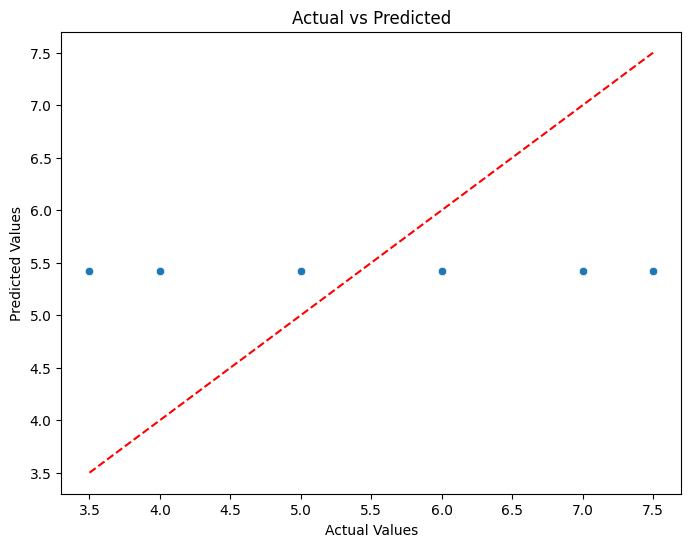

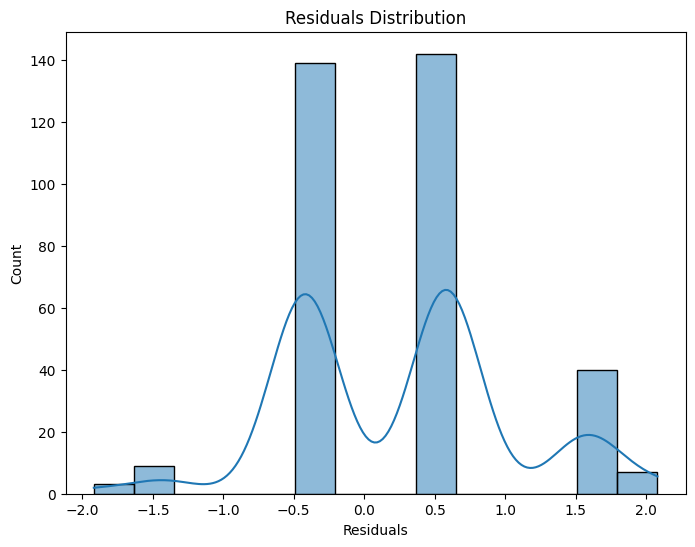

In [21]:
with mlflow.start_run():
    # Log metrics
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("R2", r2)

    # Log predictions as a CSV file
    predictions_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
    predictions_df.to_csv("predictions.csv", index=False)
    mlflow.log_artifact("predictions.csv")

    # Log visualizations
    # Actual vs Predicted Plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
    plt.savefig("actual_vs_predicted.png")
    mlflow.log_artifact("actual_vs_predicted.png")

    # Residuals Distribution Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel("Residuals")
    plt.title("Residuals Distribution")
    plt.savefig("residuals_distribution.png")
    mlflow.log_artifact("residuals_distribution.png")

print("Metrics and artifacts logged to MLflow successfully!")

In [22]:
print("\nSample Predictions:")
print(predictions_df.head())


Sample Predictions:
   Actual  Predicted
0     7.5   5.418969
1     6.0   5.418969
2     5.0   5.418969
3     5.0   5.418969
4     5.0   5.418969


In [23]:
print("\nEvaluation Metrics:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")


Evaluation Metrics:
MSE: 0.6818
MAE: 0.6973
R²: -0.0972
